# Análise de Aletas: Exemplos e Avaliação Computacional de seu Desempenho

Este notebook ilustra o uso do pacote ´hmt´ disponível em conjunto com o notebook, e implementado para uso didático, no cálculo de propriedades de aletas no estudo da intensificação de tranferência de calor via superfície estendidas. As aletas disponíveis para os exemplos são aquelas disponíveis no livro-texto "Fundamentos de Transferência de Calor e Massa", Incropera et al. 8ª ed. São elas:

1. Aletas Planas e Piniformes:
   * Retangulares;
   * Triangulares*;
   * Parabólicas*.
  
2. Aletas Circulares

Aquelas marcadas com um asterisco "*" indicam que apenas as propriedades geométricas, efetividade e eficiência destas aletas estão atualmente implementadas, pois são as funções disponíveis no livro-texto (transf. de calor é calculada a parti da eficiência da mesma). As outras possuem uma implementação completa com distribuição de temperatura, cálculo explícito de taxa de transf. de calor, efetividade e eficiência. 

### Modo de usar este notebook
Cada célula aqui representa um pedaço de código que deve ser executado clicando no botão de "play" na barra superior ou com "Shift + Enter" do teclado. Execute as células em sequência e leia as informações contidas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import ipywidgets as widgets
from IPython.display import display

In [3]:
from hmt.lib.fins import (
    FinUniformAtr,
    FinPiniformRectangular,
    FinPiniformTriangular,
    FinPiniformParabolic,
    FinPlanarRectangular,
    FinPlanarTriangular,
    FinPlanarParabolic,
    FinAnnular
)

In [4]:
# sb.set_context(
#     "talk",
#     font_scale=1.2
# )
sb.set_style(
    "darkgrid"
)

layout = widgets.Layout(
            width="50%"
         )

style = {"description_width": "initial"}

In [5]:
# Physical constants for parametric analysis
kCu = 398.0 # W/mK
kAl = 180.0 # W/mK
kSteel = 14.0 # W/mK

hNaturalConv = 5.0 # W/m2K
hForcedConv  = 1000.0 # W/m2K
hIntermediate = 100.0 

In [6]:
# Sliders for interactive plots 
thermalCondSlider = widgets.FloatSlider(
    value=kCu,
    min=kSteel,
    max=kCu,
    step=(kCu - kSteel)/100,
    description="k (W/mK)",
    readout_format='.1f',
    layout=layout,
    style=style
)

htcSlider = widgets.FloatSlider(
    value=hIntermediate,
    min=hNaturalConv,
    max=hForcedConv,
    step=(hForcedConv - hNaturalConv)/500,
    description="h (W/m2K)",
    readout_format='.1f',
    layout=layout,
    style=style
)

## Análise do Exemplo 3.9 Item 1 do Livro-texto

Um bastão muito longo, com 5 mm de diâmetro, tem uma de suas extremidades mantida a 100 °C. A superfície do bastão está exposta ao ar ambiente a 25 °C, com um coeficiente de transferência de calor por convecção de 100 $W/(m^2·K)$.

1. Determine as distribuições de temperaturas ao longo de bastões construídos em cobre puro, liga de alumínio 2024 e aço inoxidável AISI 316. Quais são as respectivas taxas de perda de calor nos bastões?

In [7]:
# Dados do problema
exHtc   = 100.0 # W/m2K
exTbase = 100.0 # Celsius
exTinf  = 25.0 # Celsius

# Dimensions
exFinRadius = 2.5e-3 # meters

Vamos supor um comprimento $L = 300 mm$ para esta aleta para avaliarmos o campo de temperatura na mesma.

In [8]:
finLength = 300.0e-3 # meters

A implementação feita aqui usa classes em Python para encapsular todas as operações necessárias para estudarmos aletas. Podemos instanciar um objeto da classe "PiniformFin" (aleta piniforme com área de seção uniforme) e informar as grandezas da mesma.

Apenas como exemplo do tipo de interação possível, vamos instanciar um objeto de aleta com a condutividade do cobre. Todas as grandezas devem ser dadas em unidades do SI, com exceção da temperatura que pode ser informada em graus Celsius.

In [9]:
pinFin = FinPiniformRectangular(
            length=finLength,
            diameter=2*exFinRadius,
            htc=exHtc,
            k=kCu,
            Tinf=exTinf,
            Tbase=exTbase
       )

Agora podemos acessar as grandezas da mesma usados suas chamadas "funções membro", como segue: 

In [10]:
# Area da superfície
pinFin.getSurfaceArea() 

0.004732023934469626

In [11]:
# Perímetro
pinFin.getPerimeter() 

0.015707963267948967

In [12]:
# Area da seção transversal
pinFin.getTrArea()

1.9634954084936207e-05

In [13]:
# Taxa total de transf. de calor (W)
pinFin.getHeatTransfer()

8.30631171973361

In [14]:
pinFin.getMaxHeatTransfer()

35.490179508522196

In [15]:
# Effetividade
pinFin.getEffectiveness()

56.404930946463836

In [16]:
# Efficiency
pinFin.getEfficiency()

0.23404535662433124

Vamos agora à comparação da distribuição de temperaturas para os 3 casos de materias considerados da aleta piniforme. Bastar executar o código a seguir. A efetividade de cada caso é mostrada na legenda da figura.

In [17]:
nPoints = 100
xRange = np.linspace(
            0.0,
            finLength,
            nPoints
         )

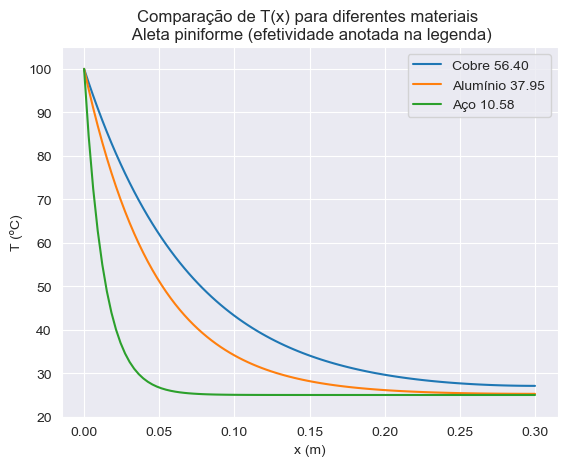

In [18]:
fig, axes = plt.subplots(
                # figsize=(8,8)
            )

for k, label in zip([kCu, kAl, kSteel],
                    ["Cobre", "Alumínio", "Aço"]):
    
    # Instantiate piniform fin model
    pinFin = FinPiniformRectangular(
                 length=finLength,
                 diameter=2*exFinRadius,
                 htc=exHtc,
                 k=k,
                 Tinf=exTinf,
                 Tbase=exTbase
             )

    # Get temperature distribution
    xRange = np.linspace(
                    0.0,
                    pinFin.getLength(),
                    nPoints
                )

    pinTemps = [pinFin.getTemperature(x)
                for x in xRange]
    
    sb.lineplot(
        x=xRange,
        y=pinTemps,
        label=f"{label} {pinFin.getEffectiveness():.2f}",
        ax=axes
    )

    axes.set(
        ylabel="T (ºC)",
        xlabel="x (m)",
        title="Comparação de T(x) para diferentes materiais \n Aleta piniforme (efetividade anotada na legenda)",
        ylim=(20,105)
    )

Claramente a efetividade da aleta de aço é menor, o que é esperado. A efetividade da aleta é melhorada quando selecionamos um material com maior condutividade térmica.

Uma versão interativa deste gráfico pode ser encontrado com o código a seguir. Use os "sliders" para controlar o valor:

1. da condutividade térmica;
2. do coef. de transferência de calor por conveccção;
3. e do raio da aleta.

In [19]:
pinRadiusSlider = widgets.FloatSlider(
    value=exFinRadius,
    min=exFinRadius,
    max=5.0*exFinRadius,
    step=exFinRadius/100,
    readout_format='.2e',
    layout=layout,
    style=style,
    description="R (m)"
)

In [20]:
@widgets.interact(
    k=thermalCondSlider,
    h=htcSlider,
    R=pinRadiusSlider
)
def InteractiveTempFin(k,h,R):
    
    fig, axes = plt.subplots(
                    # figsize=(8,6)
                )
    
    pinFinInt = FinPiniformRectangular(
                 length=finLength,
                 diameter=2*R,
                 htc=h,
                 k=k,
                 Tinf=exTinf,
                 Tbase=exTbase
             )
    
    sb.lineplot(
        x=xRange,
        y=[pinFinInt.getTemperature(x)
                for x in xRange],
        ax=axes
    )

    axes.text(
        0.32, 100,
        f"Heat transfer = {pinFinInt.getHeatTransfer():.2f} W\n"\
        f"Efetividade = {pinFinInt.getEffectiveness():.2f}\n"\
        f"Eficiência = {pinFinInt.getEfficiency():.2f}",
        ha = "left",
        va = "top"
    )

    axes.set(
        ylabel="T (ºC)",
        xlabel="x (m)",
        title="Comparação de T(x) para diferentes materiais \n Aleta piniforme",
        ylim=(20,105)
    )

interactive(children=(FloatSlider(value=398.0, description='k (W/mK)', layout=Layout(width='50%'), max=398.0, …

## Desempenhos de Aletas

### Análise da Efetividade

Note no gráfico interativo anterior o efeito de cada parâmetro de transferência de calor na distribuição de temperaturas da aleta. Quanto maior o compirmento da aleta que está a $T_\infty$, menor a sua efetividade pois ela não troca mais calor com o ambiente. Note que a efetividade e eficiência da aleta aumetam conforma k aumenta e h diminui. Se aumentarmos o raio da aleta piniforme, aumentamos ainda mais a eficiência mas a efetividade começa a diminuir! Estes efeitos são esperados.

Como vimos em aula, a partir da definição da efetividade e assumindo um modelo de aleta infinita, então podemos mostrar que a efetividade de aletas de seção uniforme é dada por:

\begin{equation}
    \epsilon_a
    =
    \left(
        \frac{
            kP
        }{
            hA_{tr}
        }
    \right)^{\frac{1}{2}}
\end{equation}

Assim, a efetividade:

1. aumenta com um valor maior de k;
2. diminui com um valor maior de h;
3. Aumenta com uma maior valor da razão $\dfrac{P}{A_{tr}}$

No caso de aleta piniforme:

\begin{equation}
    \frac{P}{A_{tr}}
    =
    \frac{
        2\pi R
    }{
        \pi R^2
    }
    =
    \frac{2}{R}
\end{equation}

Logo, quanto menor o raio da aleta piniforme, realmente maior vai ser sua efetividade. 

No caso de aletas planas retangulares, temos o seguinte:

\begin{equation}
    \frac{P}{A_{tr}}
    =
    \frac{
        2(w + t)
    }{
        wt
    }
    =
    \frac{
        2\left(1 + \dfrac{t}{w}\right)
    }{
        t
    }
\end{equation}

Assim, se $w \gg t$, quanto menor for a espessura da aleta melhor, pois sua efetividade aumentará.

### Comprimento "Útil" de Aletas

Note que para um comprimento de aproximadamente $L \approx 60mm$ da aleta de aço a aleta não troca mais calor e o resot de material é inútil em vista de sua aplicação. Este valor pode ser obtido ao se comparar a taxa de trans. de calor total da aleta com o modelo de comprimento infinito e o modelo de fronteira adiabática, pois em uma aleta com um comprimento muito longo não há mais troca de calor na sua extremidade. Assim, com esta comparação, podemos avaliar a partir de qual comprimento o modelo de aleta infinita é válido. Comparando as equações (3.81) e (3.85), podemos escrever:

\begin{equation}
    \tanh{mL} \ge 0.99
\end{equation}

O que leva a (podemos resolver esta equação usando a definição da tangente hiperbólica):

\begin{equation}
    mL \ge 2.65
    \rightarrow
    L \ge \frac{2.65}{m}
\end{equation}

sendo $m = \sqrt{\frac{hP}{kA_{tr}}}$. Assim, na prática, o comprimento das aletas deve ser menor que aproximadamente $\frac{2.65}{m}$ pois a partir desse comprimento ela não troca calor mais. No caso do problema do livro:

In [21]:
for k, mat in zip([kCu, kAl, kSteel],
                  ["Cobre", "Al", "Aço"]):
    
    fin = FinPiniformRectangular(
                length=finLength,
                diameter=2*exFinRadius,
                htc=exHtc,
                k=k,
                Tinf=exTinf,
                Tbase=exTbase
            )
    
    print(
        f"{mat} -> L >= {2.65/fin._mCoeffFin():.3f} m"
    )

Cobre -> L >= 0.187 m
Al -> L >= 0.126 m
Aço -> L >= 0.035 m


Com relação à distribuição de temperaturas, a aleta se torna mais efetiva conforme **a distribuição de temperaturas se aproxima de $T_\infty$**. Neste caso, precisamos introduzir o conceito de *eficiência das aletas*.

In [22]:
# Adding a similar planar fin
exFinWidth = 0.20
exFinThickness = 0.01

In [23]:
planarFin = FinPlanarRectangular(
                length=finLength,
                width=exFinWidth,
                thickness=exFinThickness,
                htc=exHtc,
                k=kCu,
                Tinf=exTinf,
                Tbase=exTbase
           )

In [24]:
localRadiusSlider = widgets.FloatSlider(
    value=exFinRadius,
    min=exFinRadius,
    max=5.0*exFinRadius,
    step=exFinRadius/100,
    readout_format='.2e',
    layout=layout,
    style=style
)

@widgets.interact(R=localRadiusSlider)
def InteractiveCompareFinSizes(
        R
    ):

    fig, ax = plt.subplots()
    
    pinFin = FinPiniformRectangular(
                length=finLength,
                diameter=2*R,
                htc=exHtc,
                k=kCu,
                Tinf=exTinf,
                Tbase=exTbase
           )
    
    sb.lineplot(
        x=xRange,
        y=[pinFin.getTemperature(x)
           for x in xRange],
        ax=ax,
        label=f"Piniform (V = {1.0e9*pinFin.getVolume():.2f} mm3)"
    )

    sb.lineplot(
        x=xRange,
        y=[planarFin.getTemperature(x)
           for x in xRange],
        ax=ax,
        label=f"Planar (V = {1.0e9*planarFin.getVolume():.2f} mm3)"
    )
    
    ax.set(
        ylabel="Temperature (ºC)",
        xlabel="x (m)",
        title="What radius a piniform fin must have \n to compare with a planar one?",
        ylim=(exTinf, exTbase)
    )

interactive(children=(FloatSlider(value=0.0025, description='R', layout=Layout(width='50%'), max=0.0125, min=0…

In [25]:
# Comparison of planar fins efficiency
planarFinSpecs = {"width": exFinWidth,
                  "thickness": exFinThickness}

piniformFinSpecs = {"diameter": 2*exFinRadius}
                  
tempDict = {"Tinf": exTinf,
            "Tbase": exTbase}

planarFinSpecs.update(tempDict)
piniformFinSpecs.update(tempDict)

In [26]:
def computeEfficiencyPlanarFin(arr_lengths, fin_specs):

    efficiencies = {"L": arr_lengths}
    for finClass, label in zip([FinPlanarRectangular,
                                 FinPlanarTriangular,
                                 FinPlanarParabolic],
                                ["Retangular", "Triangular", "Parabólica"]):
        
        efficiencies.update({
            label: [finClass(
                        length=L,
                        **fin_specs
                    ).getEfficiency() 
                    for L in arr_lengths]
        })

    return pd.DataFrame.from_dict(efficiencies)

In [27]:
def computeEfficiencyPiniformFin(arr_lengths, fin_specs):

    efficiencies = {"L": arr_lengths}
    for finClass, label in zip([FinPiniformRectangular,
                                 FinPiniformTriangular,
                                 FinPiniformParabolic],
                                ["Retangular", "Triangular", "Parabólica"]):
        
        efficiencies.update({
            label: [finClass(
                        length=L,
                        **fin_specs
                    ).getEfficiency() 
                    for L in arr_lengths]
        })

    return pd.DataFrame.from_dict(efficiencies)

In [28]:
lengths = np.linspace(0.0001,0.50,50)

@widgets.interact(
    k=thermalCondSlider,
    h=htcSlider
)
def InteractiveTempFin(k,h):
    
    fig, axes = plt.subplots(
                    ncols=2,
                    figsize=(15,6)
                )

    # For interactivity
    planarFinSpecs.update({"htc": h, "k": k})
    piniformFinSpecs.update({"htc": h, "k": k})

    computeEfficiencyPlanarFin(
        lengths,
        planarFinSpecs
    ).plot(x="L", ax=axes[0])

    computeEfficiencyPiniformFin(
        lengths,
        piniformFinSpecs
    ).plot(x="L",ax=axes[1])
    
    axes[0].set(
        title="Efeito de h e k na eficiência de aletas planas",
        ylabel="Eficiência",
        xlabel="L (m)",
        ylim=(0.0,1.05)
    )
    
    axes[1].set(
        title="Efeito de h e k na eficiência de aletas piniformes",
        xlabel="L (m)",
        ylim=(0.0,1.05)
    )

interactive(children=(FloatSlider(value=398.0, description='k (W/mK)', layout=Layout(width='50%'), max=398.0, …

Note que a eficiência das aletas aumenta conforme:

1. h diminui, similar ao que acontece com sua efetividade;
2. k aumenta.

Com relação ao tipo de aleta plana ou piniforme, note que quando menor o comprimento, a eficiência dos três tipos de perfil são bastante similares, enquanto para maiores comprimentos aletas planas retangulares tem maiior eficiência e aletas parabólicas tem a maior eficiência. Como podemos selecionar a aleta ideal neste caso? A engenheira ou engenheiro responsável tem de fazer uma balanço entre eficiência e custo de produção das aletas, dependendo assim da aplicação, pois pode haver restrições quando à geometria, material, etc. Aletas parabólicas, por exemplo, são de mais difícil fabricação. Com relação ao custo do material, vamos fazer uma comparação entre diferentes tipos de aletas com relação ao seu volume.

Supondo um exemplo de uma aleta de alumínio puro sob condições de convecção forçada com $h = 100 W/m²K$, vamos comparar o volume de cada tipo de aleta com um determinado comprimento Vamos usar as dimensões do exmeplo anterior.

In [29]:
condDict = {"htc": exHtc, "k": kAl}
planarFinSpecs.update(condDict)
piniformFinSpecs.update(condDict)

In [30]:
# Header
print(
    f"Comparação de Diss. Calor Por Volume\n" \
    f"Aletas Planas\n\n"\
    f"Tipo de Aleta   qa      eta    Va \n" \
    f"=============   ======  ====   ======="
)
# Comparison of volume for planar fins 
for finClass, label in zip([FinPlanarRectangular,
                             FinPlanarTriangular,
                             FinPlanarParabolic],
                            ["Retangular", "Triangular", "Parabólica"]):
    
    fin = finClass(
                length=finLength,
                **planarFinSpecs
            )

    eta = fin.getEfficiency()
    qa  = fin.getHeatTransfer()
    Va  = fin.getVolume()
    
    print(
        f"{label}      {qa:.2f}  {eta:.2f}   {1e9*Va:.1e}"
    )

Comparação de Diss. Calor Por Volume
Aletas Planas

Tipo de Aleta   qa      eta    Va 
=============   ======  ====   =======
Retangular      290.83  0.30   6.0e+05
Triangular      261.05  0.29   3.0e+05
Parabólica      243.19  0.27   2.0e+05


In [31]:
# Header
print(
    f"Comparação de Diss. Calor Por Volume\n" \
    f"Aletas Piniformes\n\n"\
    f"Tipo de Aleta   qa      eta    Va \n" \
    f"=============   ======  ====   ======="
)
# Comparison of volume for planar fins 
for finClass, label in zip([FinPiniformRectangular,
                             FinPiniformTriangular,
                             FinPiniformParabolic],
                            ["Retangular", "Triangular", "Parabólica"]):
    
    fin = finClass(
                length=finLength,
                **piniformFinSpecs
            )

    eta = fin.getEfficiency()
    qa  = fin.getHeatTransfer()
    Va  = fin.getVolume()
    
    print(
        f"{label}      {qa:.2f}    {eta:.2f}   {1e9*Va:.1e}"
    )

Comparação de Diss. Calor Por Volume
Aletas Piniformes

Tipo de Aleta   qa      eta    Va 
=============   ======  ====   =======
Retangular      5.59    0.16   5.9e+03
Triangular      4.94    0.28   2.0e+03
Parabólica      4.42    0.38   1.2e+03
